In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import re

In [2]:
link = "http://changingminds.org/disciplines/warfare/art_war/sun_tzu_annotated.htm"

In [3]:
raw_html = requests.get(link).text

In [4]:
link_tokens = re.findall('href="sun.*htm"', raw_html)

In [5]:
link_tokens[0]

'href="sun_tzu_1-1.htm"'

In [6]:
link_regex = r'href="(.*?)"'
letter_links = [re.match(link_regex, token).group(1) for token in link_tokens]

In [7]:
# remove duplicates, retain order
letter_links = list(dict.fromkeys(letter_links))

In [59]:
def get_quotes_and_commentary(soup):
    content_rows = soup.find_all('table')[2].find_all('tr')[2:]
    quotes = []
    commentary_lines = []
    for row in content_rows:
        cols = row.find_all('td')
        quote = re.sub('[\r\t\n]', '', cols[0].text)
        quote = '.'.join(quote.split('.')[1:]).strip()
        commentary = re.sub('[\r\t\n]', '', cols[1].text).strip()
        quotes.append(quote)
        commentary_lines.append(commentary)
    return quotes, commentary_lines

def parse_link(letter_page):
    page_html = requests.get(letter_page).text
    try:
        soup = BeautifulSoup(page_html, 'lxml')
        return get_quotes_and_commentary(soup)
    except Exception as e:
        print(letter_page)
        print(e)
        raise e
   

In [60]:
base_link = "http://changingminds.org/disciplines/warfare/art_war"

all_quotes = []
all_commentaries = []

for link in letter_links:
    letter_page = "{}/{}".format(base_link, link)
    quotes, commentary = parse_link(letter_page)
    # print(quotes, commentary)
    all_quotes.extend(quotes)
    all_commentaries.extend(commentary)

In [63]:
map(int, [3,4,'5'])

In [67]:
# fix_commentary
for i in range(len(all_commentaries)):
    all_commentaries[i] = '. '.join(list(map(str.strip, all_commentaries[i].split('.')))).strip()

In [68]:
with open('data/aow_commentary_by_quote.csv', 'w+', encoding='utf-8') as f:
    writer = csv.writer(f)

    writer.writerow(['title', 'body'])

    for title, line in zip(all_quotes, all_commentaries):
        writer.writerow([title, line])

In [58]:
letter_page = "http://changingminds.org/disciplines/warfare/art_war/sun_tzu_3-2.htm"
page_html = requests.get(letter_page).text
soup = BeautifulSoup(page_html, 'lxml')
get_quotes_and_commentary(soup)

(["Therefore the skillful leader subdues the enemy's troops without any fighting; he captures their cities without laying siege to them; he overthrows their kingdom without lengthy operations in the field.",
  'With his forces intact he will dispute the mastery of the Empire, and thus, without losing a man, his triumph will be complete. This is the method of attacking by stratagem.',
  "It is the rule in war, if our forces are ten to the enemy's one, to surround him; if five to one, to attack him; if twice as numerous, to divide our army into two.",
  'If equally matched, we can offer battle; if slightly inferior in numbers, we can avoid the enemy; if quite unequal in every way, we can flee from him.',
  'Hence, though an obstinate fight may be made by a small force, in the end it must be captured by the larger force.'],
 ['The best way of fighting is to avoid fighting. The best way to win a war is with superior strategy that out-thinks, out-plans and out-maneuvers the enemy such that 

In [80]:
letter_page = "https://ctext.org/dao-de-jing"
page_html = requests.get(letter_page).text
soup = BeautifulSoup(page_html, 'lxml')

In [102]:
list(range(100))[1:50:5]

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]

In [131]:
def break_into_chunks(passage, max_chunk_size=150):
    chunks = []
    curr_sequence = ''
    for sentence in re.split('[.;!?]', passage):
        sentence = sentence.strip()
        if len(sentence) > max_chunk_size:
            if len(curr_sequence) > 0:
                chunks.append(curr_sequence)
                curr_sequence = ''
            chunks.append(sentence)
        else:
            if len(curr_sequence) + len(sentence) > max_chunk_size:
                chunks.append(curr_sequence)
                curr_sequence = ''
            if len(curr_sequence) > 0:
                curr_sequence += '. ' 
            curr_sequence += sentence
    return chunks

In [132]:
break_into_chunks(soup.get_text().split('\n')[448:-20:4][0])

['(Embodying the Dao)The Dao that can be trodden is not the enduring and unchanging Dao',
 'The name that can be named is not the enduring and unchanging name. (Conceived of as) having no name, it is the Originator of heaven and earth',
 '(conceived of as) having a name, it is the Mother of all things. Always without desire we must be found,If its deep mystery we would sound',
 'But if desire always within us be,Its outer fringe is all that we shall see. Under these two aspects, it is really the same',
 'but as development takes place, it receives the different names. Together we call them the Mystery']

In [134]:
ddj_passages = soup.get_text().split('\n')[448:-20:4]
ddj_chunks = []
for passage in ddj_passages:
    ddj_chunks.extend(break_into_chunks(passage))
ddj_chunks[10:1000:50]

['that the musical notes and tones become harmonious through the relation of one with another',
 'What is meant by speaking thus of favour and disgrace. Disgrace is being in a low position (after the enjoyment of favour)',
 'Our sight it flies, our touch as well. Eluding sight, eluding touch,The forms of things all in it crouch',
 'The kingdom is a spirit-like thing, and cannot be got by active doing. He who would so win it destroys it. he who would hold it in his grasp loses it',
 'Thus it was that when the Dao was lost, its attributes appeared. when its attributes were lost, benevolence appeared',
 'To those who are sincere (with me), I am sincere. and to those who are not sincere (with me), I am also sincere. - and thus (all) get to be sincere',
 '(Transformation according to circumstances)The government that seems the most unwise,Oft goodness to the people best supplies',
 'Ability to know this model and rule constitutes what we call the mysterious excellence (of a governor)',
 'Th

In [136]:
with open('data/ddj_passages.txt', 'w+') as f:
    for chunk in ddj_chunks:
        f.write(chunk + '\n')

In [69]:
#print(soup.prettify())

In [70]:
#soup.find_all('tr')[3:7].find_all('tr')[2].find_all('td')

In [71]:
#soup.find_all('table')[2].find_all('tr')[0].find_all('td')

In [137]:
# soup.find_all('table')[2].find_all('tr')[-1].find_all('td')[1]
#re.sub('[\r\t\n]', '', soup.find_all('table')[2].find_all('tr')[-1].find_all('td')[1].text)

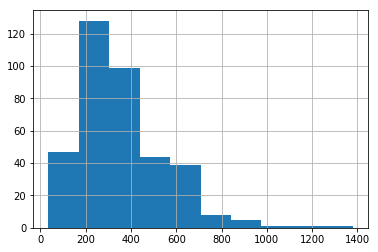

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(all_commentaries)[0].str.len().hist()
plt.show()

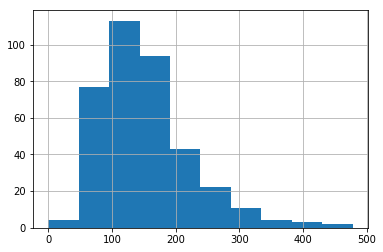

In [105]:
pd.DataFrame(all_quotes)[0].str.len().hist()
plt.show()

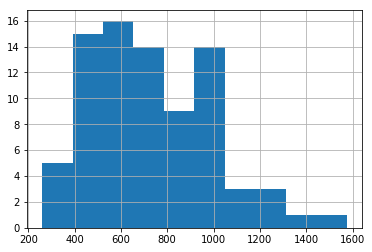

In [108]:

pd.DataFrame(soup.get_text().split('\n')[448:-20:4])[0].str.len().hist()
plt.show()